Moving average crossover
https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

Trading rules:
1. Buy when price crosses above MA and sell when it crosses below

In [1]:
#import libraries
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#define variables
SYMBOL = "^GSPC"
PERIOD = 200
STARTING_BALANCE = 10000

In [3]:
#define time period
START = datetime.datetime(2005, 1, 1)
END = datetime.datetime(2020, 1, 1)
DAYS = END - START
YEARS = DAYS.days / 365.25

In [4]:
price = yf.download(SYMBOL, start=START, end=END)

price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000
...,...,...,...,...,...,...
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296530000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2164540000
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,3240.020020,2429150000


In [5]:
#drop last two columns as they are not needed
price = price.drop(['High', 'Low', 'Volume', 'Adj Close'], axis=1)

price.head()

,Open,Close
Date,,
2005-01-03,1211.920044,1202.079956
2005-01-04,1202.079956,1188.050049
2005-01-05,1188.050049,1183.739990
2005-01-06,1183.739990,1187.890015
2005-01-07,1187.890015,1186.189941


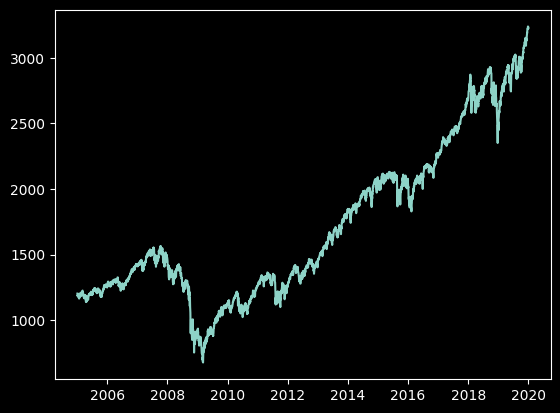

In [6]:
#plot chart
plt.style.use('dark_background')
plt.plot(price.Close)
plt.show()

In [7]:
#calculate daily return for close/close and close/open
price['Return'] = price.Close / price.Close.shift(1)

#calculate buy and hold balance
price['Bench_Bal'] = price.Return.cumprod() * STARTING_BALANCE

price.tail()

,Open,Close,Return,Bench_Bal
Date,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820


In [8]:
#calculate moving average
price['SMA'] = price.Close.rolling(window = PERIOD).mean()

price.tail()

,Open,Close,Return,Bench_Bal,SMA
Date,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,2959.558890
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,2961.703840
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,2963.861541
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,2965.855591
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,2967.844791


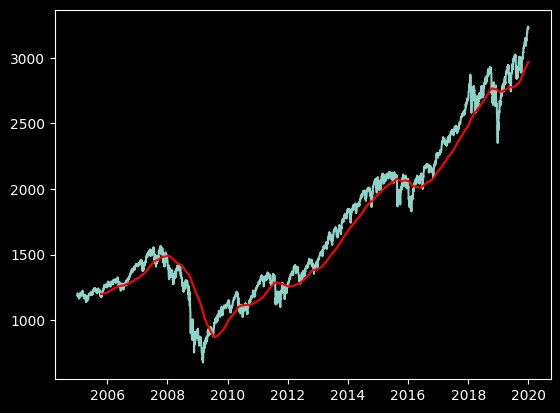

In [9]:
#plot chart with moving average overlaid
plt.plot(price.Close)
plt.plot(price.SMA, color="red")
plt.show()

In [10]:
#Hold a position for every day the close is above the 200 MA
price['Long'] = price.Close > price.SMA

price.tail()

,Open,Close,Return,Bench_Bal,SMA,Long
Date,,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,2959.558890,True
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,2961.703840,True
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,2963.861541,True
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,2965.855591,True
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,2967.844791,True


In [11]:
#calculate the daily return from Open to Open on days in the market
#on days when there is no trade, return is 1
price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)

#calculate system balance
price['Sys_Bal'] = STARTING_BALANCE * price.Sys_Return.cumprod()

price.tail()

,Open,Close,Return,Bench_Bal,SMA,Long,Sys_Return,Sys_Bal
Date,,,,,,,,
2019-12-24,3225.449951,3223.379883,0.999805,26815.020636,2959.558890,True,0.999805,20578.552429
2019-12-26,3227.199951,3239.909912,1.005128,26952.532532,2961.703840,True,1.005128,20684.082676
2019-12-27,3247.229980,3240.020020,1.000034,26953.448506,2963.861541,True,1.000034,20684.785618
2019-12-30,3240.090088,3221.290039,0.994219,26797.635406,2965.855591,True,0.994219,20565.210545
2019-12-31,3215.179932,3230.780029,1.002946,26876.581820,2967.844791,True,1.002946,20625.796101


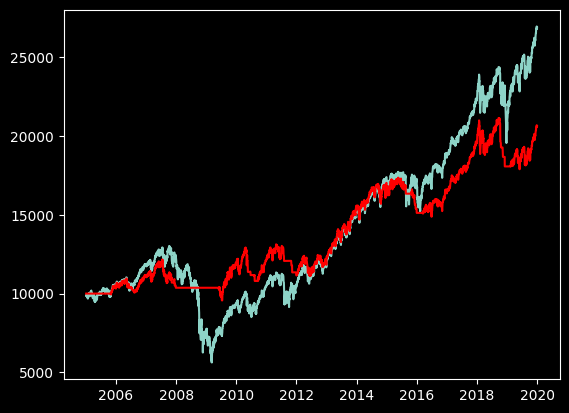

In [12]:
plt.plot(price.Bench_Bal)
plt.plot(price.Sys_Bal, color="red")

plt.show()

In [13]:
#calculate drawdown
#benchmark
price['Bench_Peak'] = price.Bench_Bal.cummax()

price['Bench_DD'] = price.Bench_Bal - price.Bench_Peak

bench_dd = round((((price.Bench_DD / price.Bench_Peak).min()) * 100), 2)

#system
price['Sys_Peak'] = price['Sys_Bal'].cummax()

price['Sys_DD'] = price['Sys_Peak'] - price['Sys_Bal']

sys_dd = round(((price.Sys_DD / price.Sys_Peak).max()) * -100, 2)

In [14]:
#calculate metrics
bench_return = round(((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1]) - 1) * 100, 2)
bench_cagr = round(((((price.Bench_Bal.iloc[-1]/price.Bench_Bal.iloc[1])**(1/YEARS))-1)*100), 2)
sys_return = round(((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0]) - 1) * 100, 2)
sys_cagr = round(((((price.Sys_Bal.iloc[-1]/price.Sys_Bal.iloc[0])**(1/YEARS))-1)*100), 2)
sys_tim = round((price.Long.sum() / price.shape[0]) * 100, 2)

print(f'Benchmark Total return: {bench_return}%')
print(f'Benchmark CAGR: {bench_cagr}')
print(f'Benchmark DD: {bench_dd}%')
print('')
print(f'System Total return: {sys_return}%')
print(f'System CAGR: {sys_cagr}')
print(f'System DD: {sys_dd}%')
print(f'System Time in the Market: {sys_tim}%')

Benchmark Total return: 171.94%
Benchmark CAGR: 6.9
Benchmark DD: -56.78%

System Total return: 106.26%
System CAGR: 4.95
System DD: -21.31%
System Time in the Market: 73.11%


In [15]:
def backtest(price, period):
    #calculate moving average
    price['SMA'] = price.Close.rolling(window = period).mean()
    
    #Hold a position for every day the close is above the MA
    price['Long'] = price.Close > price.SMA
    
    #on days when there is no trade, return is 1
    price['Sys_Return'] = np.where(price.Long.shift(1) == True, price.Return, 1)
    
    #calculate balance
    price['Sys_Balance'] = STARTING_BALANCE * price.Sys_Return.cumprod()
    
    cagr_system = (((price.Sys_Balance.iloc[-1]/price.Sys_Balance.iloc[0])**(1/YEARS))-1)*100
    
    return cagr_system

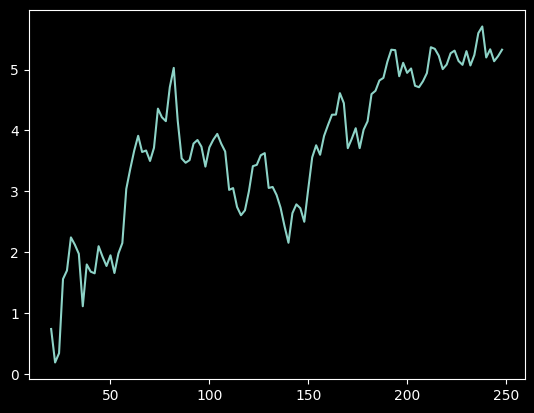

In [16]:
periods = []
periods.extend(range(20, 250, 2))
cagr = []

for period in periods:
    result = backtest(price, period)
    cagr.append(result)

plt.plot(periods, cagr)
plt.show()

In [17]:
optimal_value = periods[cagr.index(max(cagr))]

optimal_value

238